# Practice Exercise on Artificial Neural Networks (ANN)

Welcome to the Practice Exercise on Artificial Neural Networks (ANN). In this exercise, we will focus on a classification task where the goal is to predict customer churn. We will work with a dataset to build, train, and evaluate ANN model. This practice will allow you to apply your understanding of neural networks to achieve the best performance.

---

## Dataset Overview

### **Dataset Name:** Telco Customer Churn

### **Description:**  
The dataset contains customer data from a telecommunications company and is used to predict customer churn. Churn refers to customers who stopped using the company's service within the last month. Each row represents a customer, and the dataset includes information about customer demographics, account information, and the services they have signed up for.

### **Features:**
The dataset contains the following columns:

- `customerID`: Unique identifier for the customer.
- `gender`: Gender of the customer (Male, Female).
- `SeniorCitizen`: Whether the customer is a senior citizen (1: Yes, 0: No).
- `Partner`: Whether the customer has a partner (Yes, No).
- `Dependents`: Whether the customer has dependents (Yes, No).
- `tenure`: Number of months the customer has stayed with the company.
- `PhoneService`: Whether the customer has phone service (Yes, No).
- `MultipleLines`: Whether the customer has multiple lines (Yes, No, No phone service).
- `InternetService`: Customer’s internet service provider (DSL, Fiber optic, No).
- `OnlineSecurity`: Whether the customer has online security (Yes, No, No internet service).
- `OnlineBackup`: Whether the customer has online backup (Yes, No, No internet service).
- `DeviceProtection`: Whether the customer has device protection (Yes, No, No internet service).
- `TechSupport`: Whether the customer has tech support (Yes, No, No internet service).
- `StreamingTV`: Whether the customer has streaming TV service (Yes, No, No internet service).
- `StreamingMovies`: Whether the customer has streaming movies service (Yes, No, No internet service).
- `Contract`: The contract term of the customer (Month-to-month, One year, Two year).
- `PaperlessBilling`: Whether the customer has paperless billing (Yes, No).
- `PaymentMethod`: The payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
- `MonthlyCharges`: The amount charged to the customer monthly.
- `TotalCharges`: The total amount charged to the customer.
- `Churn`: Whether the customer churned (Yes, No).

### **Target Variable:**
- `Churn`: The variable that indicates whether a customer has churned or not.

## Importing Libraries

In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout

## Exploratory Data Analysis (EDA)

* **Inspect the dataset**: The first step is to load the dataset and examine its structure. You will look at the first few rows to ensure it has been correctly loaded and check for basic formatting issues.

* **Dataset structure**: Understand the structure of the dataset, including the number of rows, columns, and data types of each feature. This helps to identify categorical and numerical features and assess the need for data cleaning.

* **Summary statistics**: Generate summary statistics to better understand the distribution of numerical features. This includes measures like mean, median, standard deviation, minimum, and maximum values.

* **Check for missing values**: Identify any missing values in the dataset, as they can influence model performance.

* **Distribution of features**: Plot the distributions of numerical features to identify skewness, outliers, or unusual patterns.

* **Categorical feature analysis**: For categorical variables, count the frequency of each category.


And add more as needed!


In [2]:
# Load the dataset
df = pd.read_csv('/content/Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Check the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Check for missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
df.dropna(inplace=True)

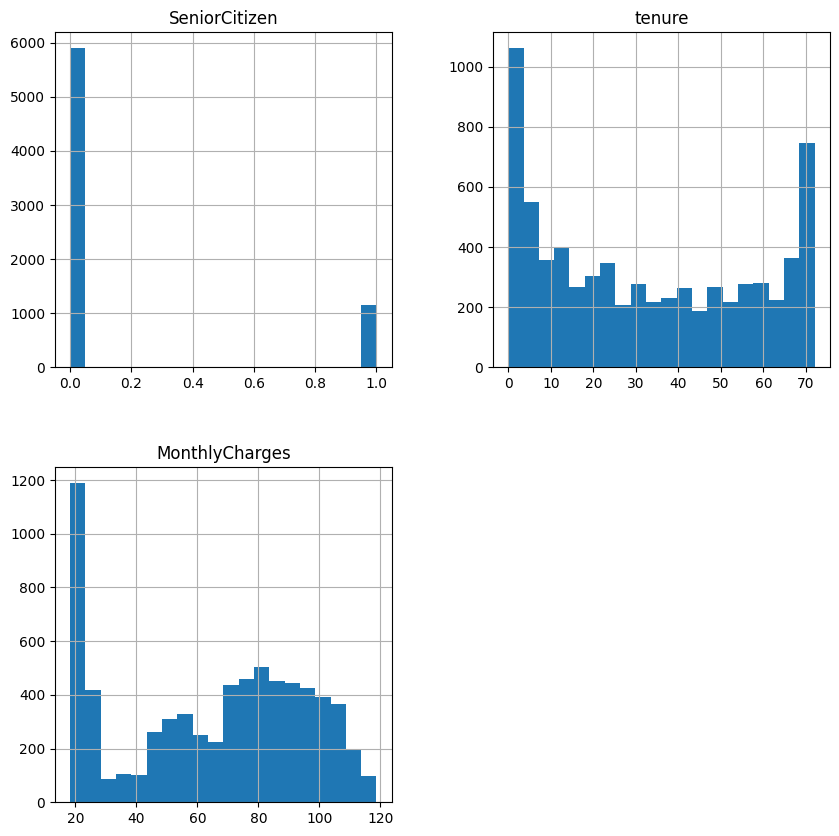

In [5]:
# Get summary statistics
df.describe()

# Check the distribution of numerical features
df.hist(bins=20, figsize=(10, 10))
plt.show()

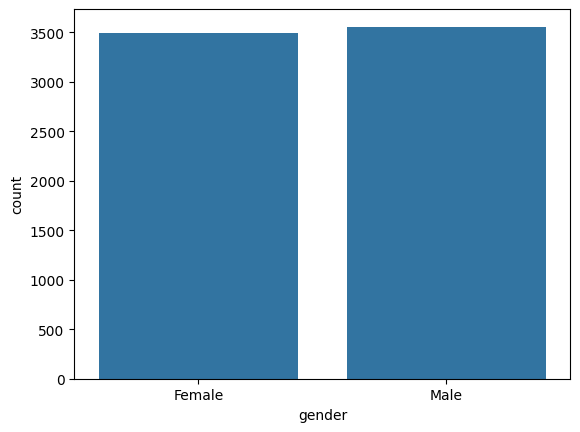

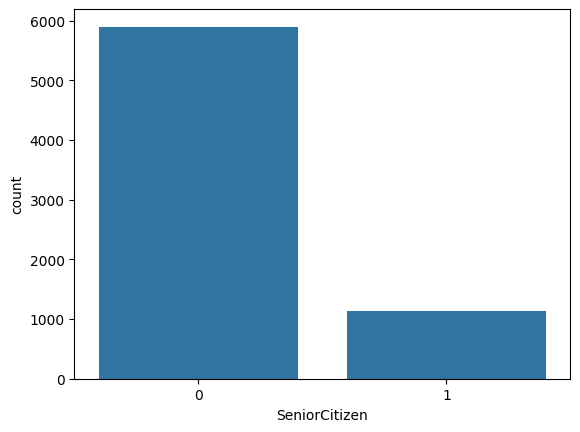

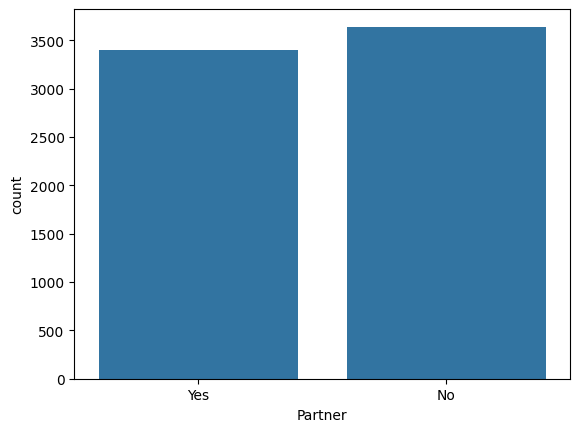

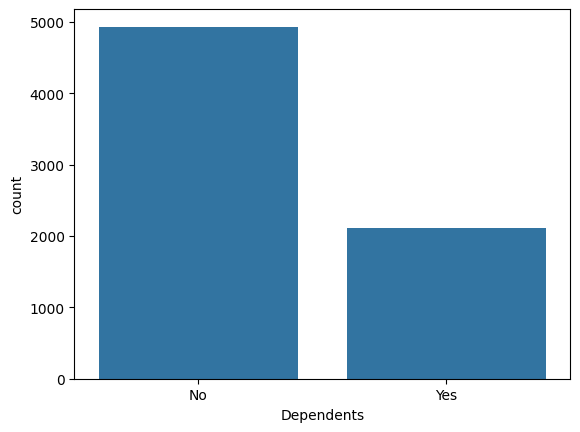

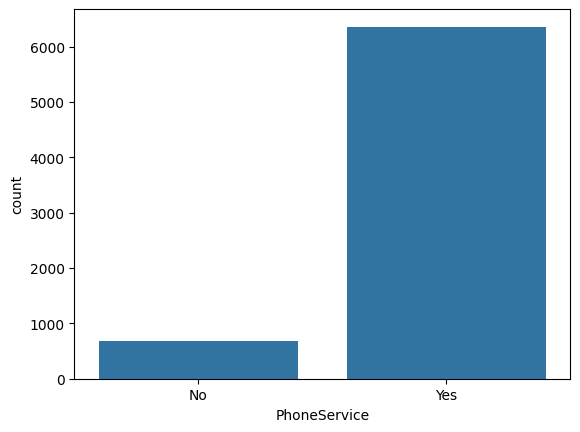

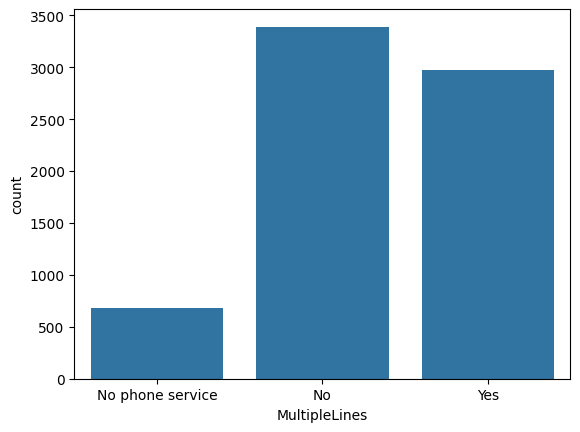

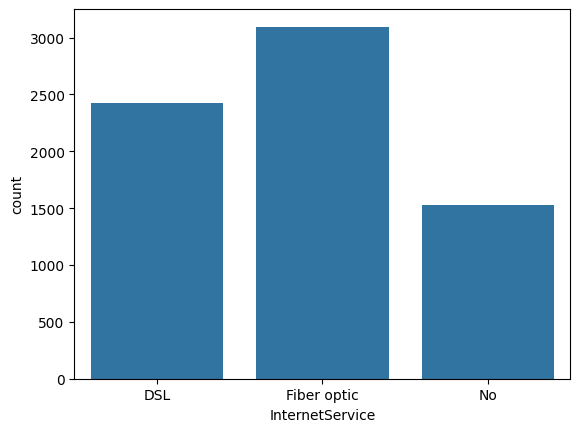

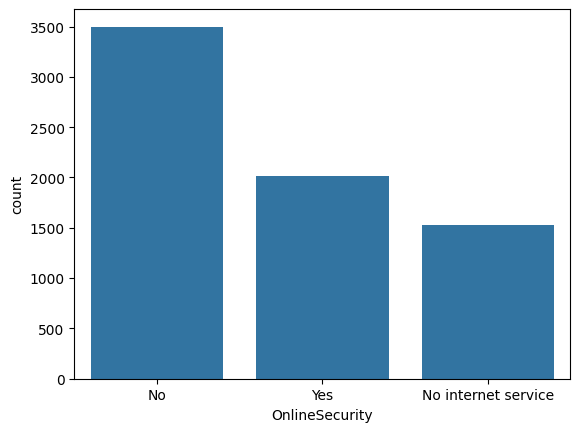

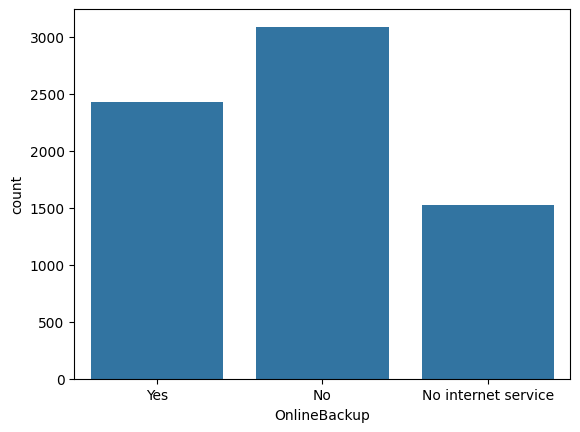

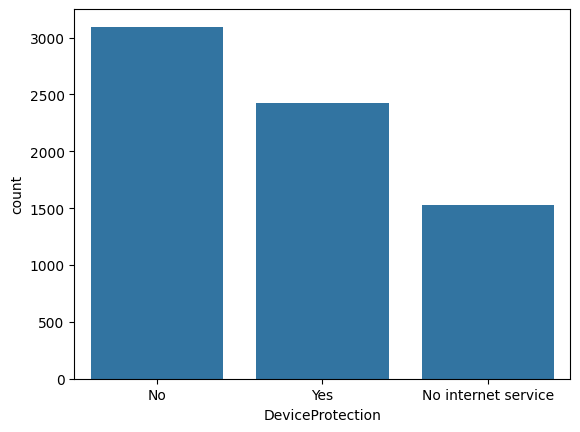

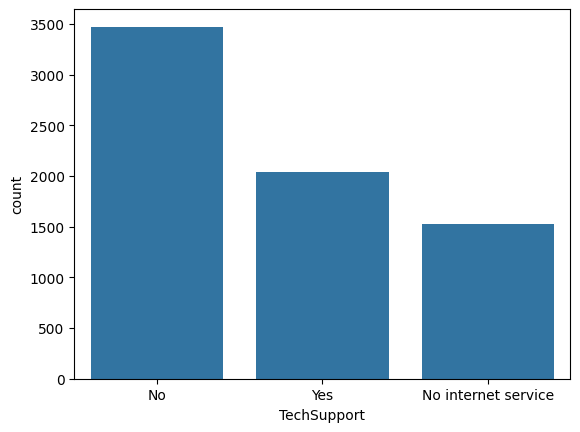

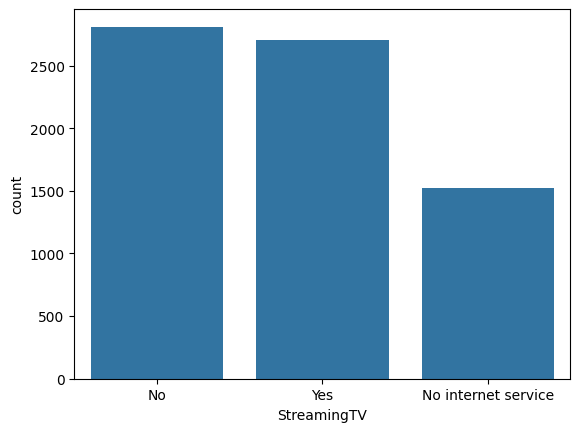

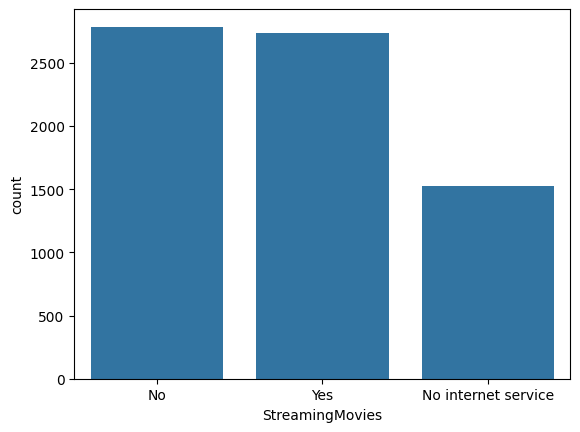

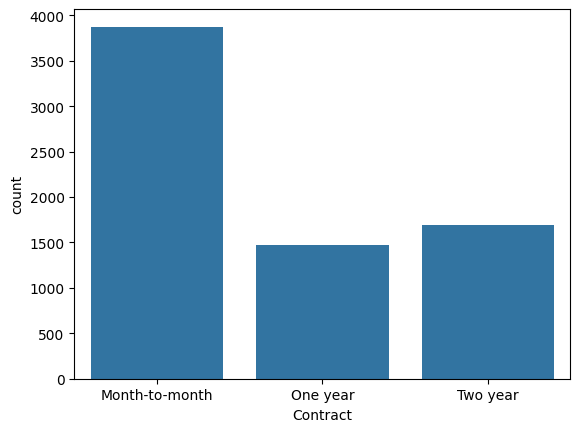

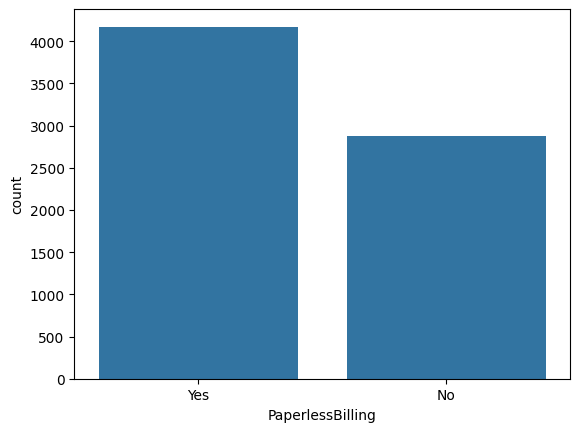

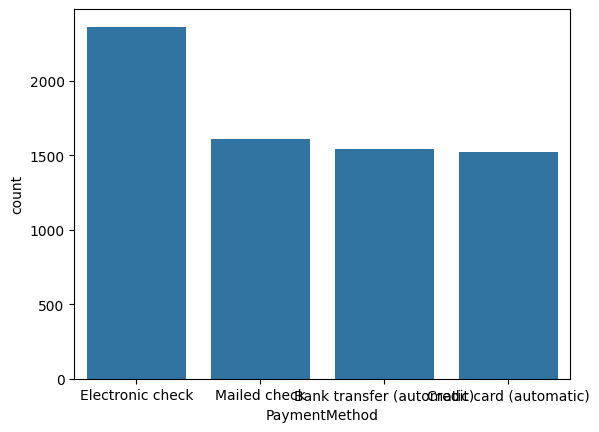

In [7]:
# Plot count of categorical variables
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for col in categorical_columns:
    sns.countplot(x=col, data=df)
    plt.show()

## Data Preprocessing

* **Handling missing values**: If there are any missing values identified during EDA, you must decide how to handle them. Common strategies include removing rows or columns with missing values, or imputing them using methods like the mean, median, or a constant value.

* **Encoding categorical variables**: For machine learning models, categorical variables often need to be converted into numerical representations. Common techniques include:
   - **One-hot encoding**: Converts categorical variables into a series of binary columns.
   - **Label encoding**: Assigns a unique integer to each category.
   
* **Scaling and normalization**: Features often need to be scaled so that all of them contribute equally to the model. Two common techniques include:
   - **Standardization (Z-score scaling)**: Centers the data around a mean of 0 and standard deviation of 1. This is suitable for algorithms that assume normally distributed data, such as neural networks.
   - **Min-Max scaling (Normalization)**: Scales the data to a range (usually between 0 and 1). This technique is useful when the algorithm requires a bounded input range, such as in some neural networks.

* **Feature engineering**: In this step, new features can be created from the existing data to enhance the model’s predictive power. This may include combining features, applying mathematical transformations, or encoding domain-specific information.

* **Handling imbalanced data** (if applicable): If the dataset has imbalanced classes, it may be necessary to apply techniques such as:
   - **Oversampling** the minority class.
   - **Undersampling** the majority class.

And add more as needed!


In [9]:
# Encode 'Churn' as the target variable
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Label encoding for binary categorical columns
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# One-hot encoding for other categorical columns
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines', 'OnlineSecurity',
                                 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'])

In [13]:
# Convert 'TotalCharges' to numeric, coerce invalid values to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values in 'TotalCharges' after conversion
missing_totalcharges = df['TotalCharges'].isnull().sum()
print(f'Missing values in TotalCharges: {missing_totalcharges}')

# Option 1: Fill missing values with the median of 'TotalCharges'
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Verify the changes
df.info()

Missing values in TotalCharges: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   PaperlessBilling                         7043 non-null   int64  
 8   MonthlyCharges                           7043 non-null   float64
 9   TotalCharges                             7043 non-null   float64
 10  Churn        

In [14]:
# Scale numerical features

scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [29]:
# Split the dataset into features (X) and target (y)
X = df.drop(columns=['customerID','Churn'])
y = df['Churn']

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [32]:
# Initialize the ANN model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metric.

In [33]:
# Compile the ANN model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6308 - loss: 0.6747 - val_accuracy: 0.7959 - val_loss: 0.4476
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7322 - loss: 0.5247 - val_accuracy: 0.7817 - val_loss: 0.4328
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7489 - loss: 0.4937 - val_accuracy: 0.8075 - val_loss: 0.4262
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7709 - loss: 0.4634 - val_accuracy: 0.8146 - val_loss: 0.4211
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7615 - loss: 0.4757 - val_accuracy: 0.8110 - val_loss: 0.4207
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7548 - loss: 0.4757 - val_accuracy: 0.8030 - val_loss: 0.4191
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7753 - loss: 0.4588 - val_accuracy: 0.8146 - val_loss: 0.4190
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7779 - loss: 0.4522 - val_accuracy: 0.

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [35]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8136 - loss: 0.4036
Test Accuracy: 0.8133


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [36]:
# Predict the churn probabilities for the test set
y_pred = model.predict(X_test)

# Convert probabilities to binary values (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

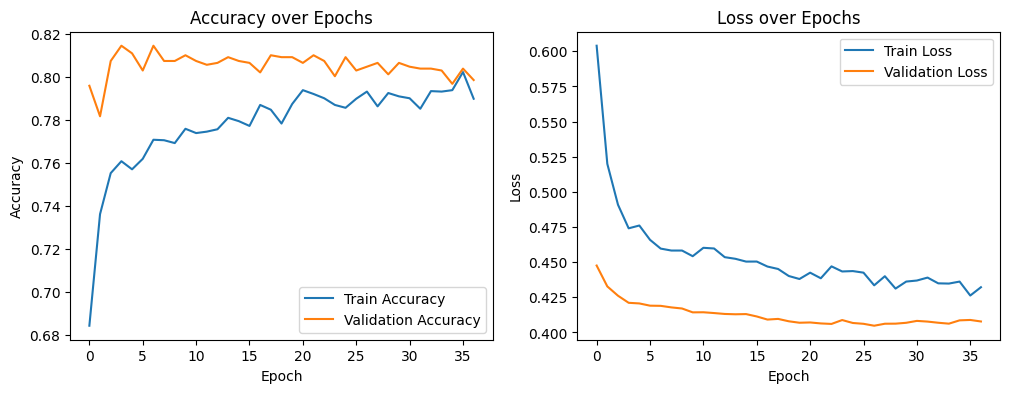

In [37]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
# Save the trained model
model.save('customer_churn_ann_model.h5')